In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from collections import deque
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("data.csv")
data_by_artist = pd.read_csv("data_by_artist.csv")
data_by_genres = pd.read_csv("data_by_genres.csv")
data_by_year = pd.read_csv("data_by_year.csv")
data_w_genres = pd.read_csv("data_w_genres.csv")

In [ ]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
data_w_genres.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [ ]:
data_by_year.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [ ]:
# 🧼 Basic cleaning
feature_columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

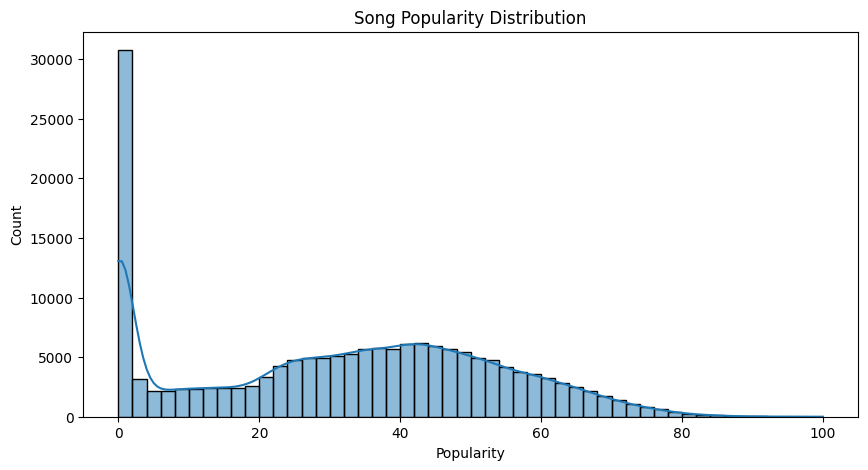

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data['popularity'], bins=50, kde=True)
plt.title("Song Popularity Distribution")
plt.xlabel("Popularity")
plt.show()

In [ ]:
# 👑 Top 10 most popular artists
print("\n🎤 Top 10 Most Popular Artists:")
top_artists = data.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)
print(top_artists)

# 🎶 Top 10 most popular songs
print("\n🎵 Top 10 Most Popular Songs:")
top_songs = data[['name', 'artists', 'popularity']].sort_values(by='popularity', ascending=False).drop_duplicates().head(10)
print(top_songs)


🎤 Top 10 Most Popular Artists:
artists
['Bad Bunny', 'Jhay Cortez']                                  100.0
['24kGoldn', 'iann dior']                                      99.0
['Cardi B', 'Megan Thee Stallion']                             96.0
['Justin Bieber', 'benny blanco']                              95.0
['Sech', 'Daddy Yankee', 'J Balvin', 'ROSALÍA', 'Farruko']     94.0
['Joel Corry', 'MNEK']                                         94.0
['Drake', 'Lil Durk']                                          93.0
['Ritt Momney']                                                93.0
['Lele Pons', 'Guaynaa']                                       92.0
['J Balvin', 'Tainy', 'Dua Lipa', 'Bad Bunny']                 92.0
Name: popularity, dtype: float64

🎵 Top 10 Most Popular Songs:
                                          name  \
19611                                   Dakiti   
19606                   Mood (feat. iann dior)   
19618                                 Dynamite   
19616            

In [ ]:
# 1. Start with the full dataset
# (assuming you merged all CSVs into `data`)

# 2. Filter for popular songs
popular_data = data[data['popularity'] >=50]  # or 60

# 3. THEN sample from filtered data
data = popular_data.sample(min(5000, len(popular_data)), random_state=42).reset_index(drop=True)

# 4. Debug info
print(f"🎯 Filtered songs count: {len(data)}")


🎯 Filtered songs count: 5000


In [ ]:
print("🎶 Filtered Songs (with Artist & Popularity):\n")
for i, row in data.iterrows():
    print(f"{i+1}. 🎵 {row['name']}  |  🎤 {row['artists']}  |  📈 Popularity: {row['popularity']}")


Streaming output truncated to the last 5000 lines.
1. 🎵 Adagio For Strings And Organ In G Minor  |  🎤 ['Tomaso Albinoni', 'Berliner Philharmoniker', 'Herbert von Karajan', 'David Bell', 'Leon Spierer']  |  📈 Popularity: 53
2. 🎵 Take Me with U  |  🎤 ['Prince']  |  📈 Popularity: 51
3. 🎵 Where's My Love - Alternate Version  |  🎤 ['SYML']  |  📈 Popularity: 67
4. 🎵 We Get By  |  🎤 ['Cody Jinks']  |  📈 Popularity: 56
5. 🎵 Pigs (Three Different Ones)  |  🎤 ['Pink Floyd']  |  📈 Popularity: 56
6. 🎵 Jack Daniel's, If You Please  |  🎤 ['David Allan Coe']  |  📈 Popularity: 51
7. 🎵 Ticks & Leeches  |  🎤 ['TOOL']  |  📈 Popularity: 56
8. 🎵 Haremos El Amor  |  🎤 ['Tony Vega']  |  📈 Popularity: 53
9. 🎵 Stupid Hoe  |  🎤 ['Nicki Minaj']  |  📈 Popularity: 54
10. 🎵 El Corazon Es Un Gitano  |  🎤 ['Nicola Di Bari']  |  📈 Popularity: 52
11. 🎵 On Top  |  🎤 ['Flume', 'T-Shirt']  |  📈 Popularity: 50
12. 🎵 Don't Waste My Time (feat. Ella Mai)  |  🎤 ['Usher', 'Ella Mai']  |  📈 Popularity: 64
13. 🎵 Sarcophagus III 

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[feature_columns])
data['state_vector'] = list(data_scaled)


In [ ]:
def discretize_state(row, feature_columns, precision=1):
    return tuple(np.round(row[feature_columns], precision))


In [ ]:
from collections import defaultdict
import numpy as np
import random
from tqdm import tqdm

alpha = 0.1
gamma = 0.9
epsilon = 1.0
epsilon_decay = 0.98
min_epsilon = 0.05
episodes = 100
precision = 1  # Rounding precision for discretization

# Q-table: dict[state -> dict[action -> value]]
Q = defaultdict(lambda: defaultdict(float))

for ep in range(episodes):
    print(f"🚀 Episode {ep+1}")
    sampled = data.sample(1000, random_state=ep)

    for _, row in tqdm(sampled.iterrows(), total=1000, desc="Training"):
        state = discretize_state(row, feature_columns, precision)
        valid_actions = list(data.index)  # Actions = all song indices

        if random.random() < epsilon:
            action = random.choice(valid_actions)
        else:
            action = max(Q[state], key=Q[state].get, default=random.choice(valid_actions))

        reward = data.loc[action]['popularity'] / 100
        next_state = state  # No environment change

        best_next_action = max(Q[next_state], key=Q[next_state].get, default=0)
        Q[state][action] += alpha * (reward + gamma * Q[next_state][best_next_action] - Q[state][action])

    epsilon = max(min_epsilon, epsilon * epsilon_decay)


🚀 Episode 1


Training: 100%|██████████| 1000/1000 [00:01<00:00, 715.05it/s]


🚀 Episode 2


Training: 100%|██████████| 1000/1000 [00:01<00:00, 627.27it/s]


🚀 Episode 3


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1228.91it/s]


🚀 Episode 4


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1453.99it/s]


🚀 Episode 5


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1440.72it/s]


🚀 Episode 6


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1446.52it/s]


🚀 Episode 7


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1420.80it/s]


🚀 Episode 8


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1447.50it/s]


🚀 Episode 9


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1441.20it/s]


🚀 Episode 10


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1226.94it/s]


🚀 Episode 11


Training: 100%|██████████| 1000/1000 [00:01<00:00, 969.50it/s]


🚀 Episode 12


Training: 100%|██████████| 1000/1000 [00:01<00:00, 957.62it/s]


🚀 Episode 13


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1437.80it/s]


🚀 Episode 14


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1430.62it/s]


🚀 Episode 15


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1426.35it/s]


🚀 Episode 16


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1432.26it/s]


🚀 Episode 17


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1427.39it/s]


🚀 Episode 18


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1413.70it/s]


🚀 Episode 19


Training: 100%|██████████| 1000/1000 [00:01<00:00, 762.34it/s]


🚀 Episode 20


Training: 100%|██████████| 1000/1000 [00:01<00:00, 723.99it/s]


🚀 Episode 21


Training: 100%|██████████| 1000/1000 [00:01<00:00, 720.61it/s]


🚀 Episode 22


Training: 100%|██████████| 1000/1000 [00:01<00:00, 721.38it/s]


🚀 Episode 23


Training: 100%|██████████| 1000/1000 [00:02<00:00, 346.36it/s]


🚀 Episode 24


Training: 100%|██████████| 1000/1000 [00:01<00:00, 598.37it/s]


🚀 Episode 25


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1214.13it/s]


🚀 Episode 26


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1404.13it/s]


🚀 Episode 27


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1453.96it/s]


🚀 Episode 28


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1386.53it/s]


🚀 Episode 29


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1395.42it/s]


🚀 Episode 30


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1422.17it/s]


🚀 Episode 31


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1433.53it/s]


🚀 Episode 32


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1424.58it/s]


🚀 Episode 33


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1421.60it/s]


🚀 Episode 34


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1454.10it/s]


🚀 Episode 35


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1408.79it/s]


🚀 Episode 36


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1106.74it/s]


🚀 Episode 37


Training: 100%|██████████| 1000/1000 [00:01<00:00, 925.18it/s]


🚀 Episode 38


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1073.72it/s]


🚀 Episode 39


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1423.95it/s]


🚀 Episode 40


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1394.79it/s]


🚀 Episode 41


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1400.94it/s]


🚀 Episode 42


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1384.69it/s]


🚀 Episode 43


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1438.45it/s]


🚀 Episode 44


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1365.52it/s]


🚀 Episode 45


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1409.85it/s]


🚀 Episode 46


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1442.68it/s]


🚀 Episode 47


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1396.76it/s]


🚀 Episode 48


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1375.42it/s]


🚀 Episode 49


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1404.92it/s]


🚀 Episode 50


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1381.45it/s]


🚀 Episode 51


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1367.66it/s]


🚀 Episode 52


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1070.82it/s]


🚀 Episode 53


Training: 100%|██████████| 1000/1000 [00:01<00:00, 935.50it/s]


🚀 Episode 54


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1095.05it/s]


🚀 Episode 55


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1406.73it/s]


🚀 Episode 56


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1394.96it/s]


🚀 Episode 57


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1392.98it/s]


🚀 Episode 58


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1381.20it/s]


🚀 Episode 59


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1373.45it/s]


🚀 Episode 60


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1378.11it/s]


🚀 Episode 61


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1375.23it/s]


🚀 Episode 62


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1377.92it/s]


🚀 Episode 63


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1377.40it/s]


🚀 Episode 64


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1286.47it/s]


🚀 Episode 65


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1389.75it/s]


🚀 Episode 66


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1375.42it/s]


🚀 Episode 67


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1390.66it/s]


🚀 Episode 68


Training: 100%|██████████| 1000/1000 [00:01<00:00, 951.93it/s]


🚀 Episode 69


Training: 100%|██████████| 1000/1000 [00:01<00:00, 900.84it/s]


🚀 Episode 70


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1302.42it/s]


🚀 Episode 71


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1425.62it/s]


🚀 Episode 72


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1369.75it/s]


🚀 Episode 73


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1373.97it/s]


🚀 Episode 74


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1360.43it/s]


🚀 Episode 75


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1380.73it/s]


🚀 Episode 76


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1408.13it/s]


🚀 Episode 77


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1350.63it/s]


🚀 Episode 78


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1405.12it/s]


🚀 Episode 79


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1386.12it/s]


🚀 Episode 80


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1368.55it/s]


🚀 Episode 81


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1001.93it/s]


🚀 Episode 82


Training: 100%|██████████| 1000/1000 [00:01<00:00, 893.10it/s]


🚀 Episode 83


Training: 100%|██████████| 1000/1000 [00:01<00:00, 835.67it/s]


🚀 Episode 84


Training: 100%|██████████| 1000/1000 [00:01<00:00, 893.46it/s]


🚀 Episode 85


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1290.91it/s]


🚀 Episode 86


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1402.57it/s]


🚀 Episode 87


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1364.53it/s]


🚀 Episode 88


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1398.60it/s]


🚀 Episode 89


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1347.97it/s]


🚀 Episode 90


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1364.50it/s]


🚀 Episode 91


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1381.13it/s]


🚀 Episode 92


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1346.20it/s]


🚀 Episode 93


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1404.89it/s]


🚀 Episode 94


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1347.89it/s]


🚀 Episode 95


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1373.03it/s]


🚀 Episode 96


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1361.22it/s]


🚀 Episode 97


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1364.81it/s]


🚀 Episode 98


Training: 100%|██████████| 1000/1000 [00:00<00:00, 1150.35it/s]


🚀 Episode 99


Training: 100%|██████████| 1000/1000 [00:01<00:00, 921.56it/s]


🚀 Episode 100


Training: 100%|██████████| 1000/1000 [00:01<00:00, 988.94it/s]


In [ ]:
def recommend_song_q(song_name, data, Q, feature_columns, top_n=10, precision=1):
    match = data[data['name'].str.lower().str.contains(song_name.lower())]
    if match.empty:
        print("❌ Song not found.")
        return

    row = match.iloc[0]
    state = discretize_state(row, feature_columns, precision)

    if state not in Q:
        print("⚠️ No Q-values for this song state yet.")
        return

    top_actions = sorted(Q[state].items(), key=lambda x: x[1], reverse=True)[:top_n]

    print(f"\n🎵 Top {top_n} Recommended Songs:")
    for i, (action_idx, _) in enumerate(top_actions):
        song = data.loc[action_idx]
        print(f"\n📌 Name: {song['name']}")
        print(f"🎤 Artist: {song['artists']}")
        print(f"📈 Popularity: {song['popularity']}")


In [ ]:
user_input = input("🎧 Enter a song name you like: ")
recommend_song_q(user_input, data, Q, feature_columns)


🎧 Enter a song name you like: arcade

🎵 Top 10 Recommended Songs:

📌 Name: Cabrón y Vago - En Vivo
🎤 Artist: ['El Fantasma', 'Los Dos Carnales']
📈 Popularity: 81

📌 Name: Schemin Up (feat. Drake and P. Reign)
🎤 Artist: ['OB OBrien', 'Drake', 'Preme']
📈 Popularity: 51

📌 Name: the WORLD
🎤 Artist: ['Nightmare', 'DEATH NOTE デスノート']
📈 Popularity: 61

📌 Name: Here for the Party
🎤 Artist: ['Gretchen Wilson']
📈 Popularity: 59

📌 Name: Will you be there when I wake up
🎤 Artist: ['Gemma Casimaty']
📈 Popularity: 71

📌 Name: Bitter Sweet Symphony
🎤 Artist: ['The Verve']
📈 Popularity: 61

📌 Name: Think Of Me
🎤 Artist: ['Andrew Lloyd Webber', 'Emmy Rossum', 'Patrick Wilson']
📈 Popularity: 56

📌 Name: 7 Words
🎤 Artist: ['Deftones']
📈 Popularity: 51

📌 Name: Milestones
🎤 Artist: ['Miles Davis']
📈 Popularity: 56

📌 Name: Adagio For Strings And Organ In G Minor
🎤 Artist: ['Tomaso Albinoni', 'Berliner Philharmoniker', 'Herbert von Karajan', 'David Bell', 'Leon Spierer']
📈 Popularity: 53
